In [2]:
import warnings 
warnings.filterwarnings('ignore')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
%matplotlib inline
from sklearn.datasets import load_boston 

In [6]:
boston_dataset = load_boston()

In [7]:
boston = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

In [8]:
boston['MEDV']= boston_dataset.target

In [9]:
boston.shape

(506, 14)

In [10]:
boston.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [11]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [12]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

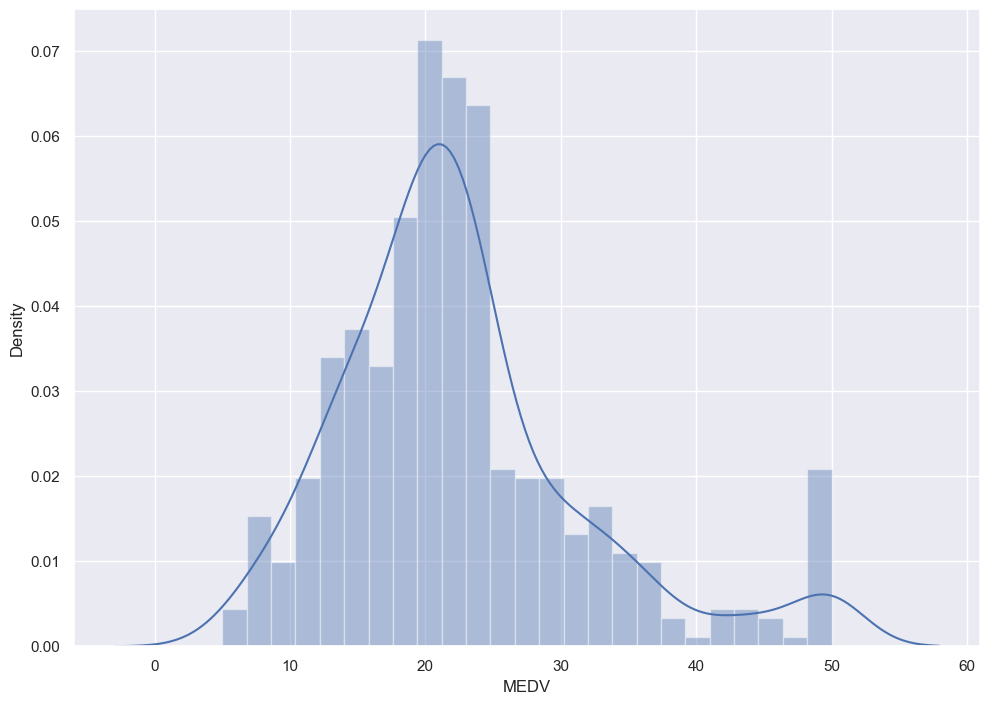

In [14]:
#sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=25)


<AxesSubplot:>

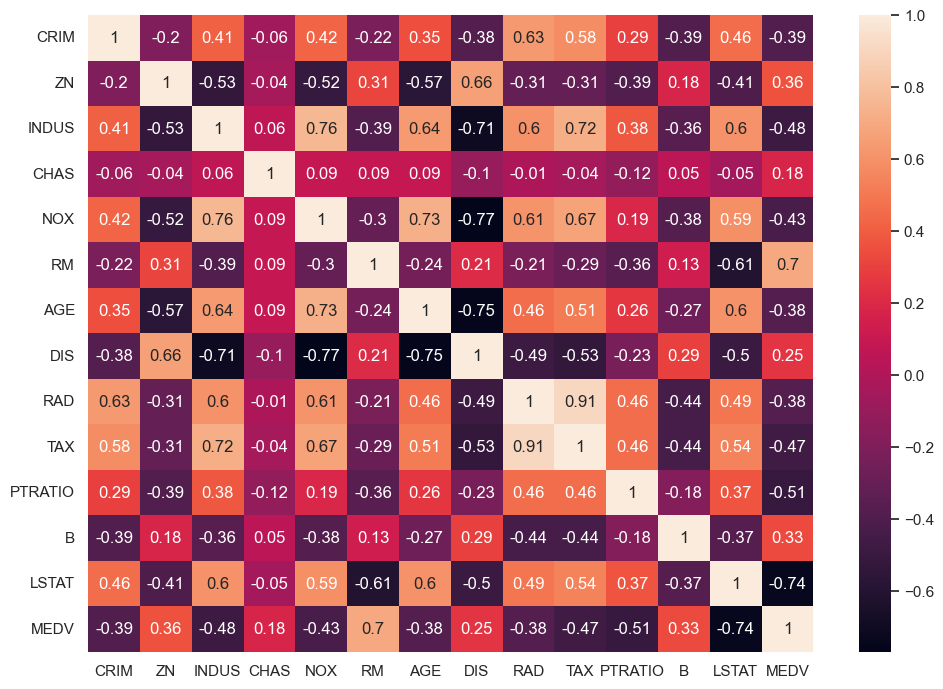

In [15]:
corr_matrix= boston.corr().round(2)

sns.heatmap(data=corr_matrix, annot=True)

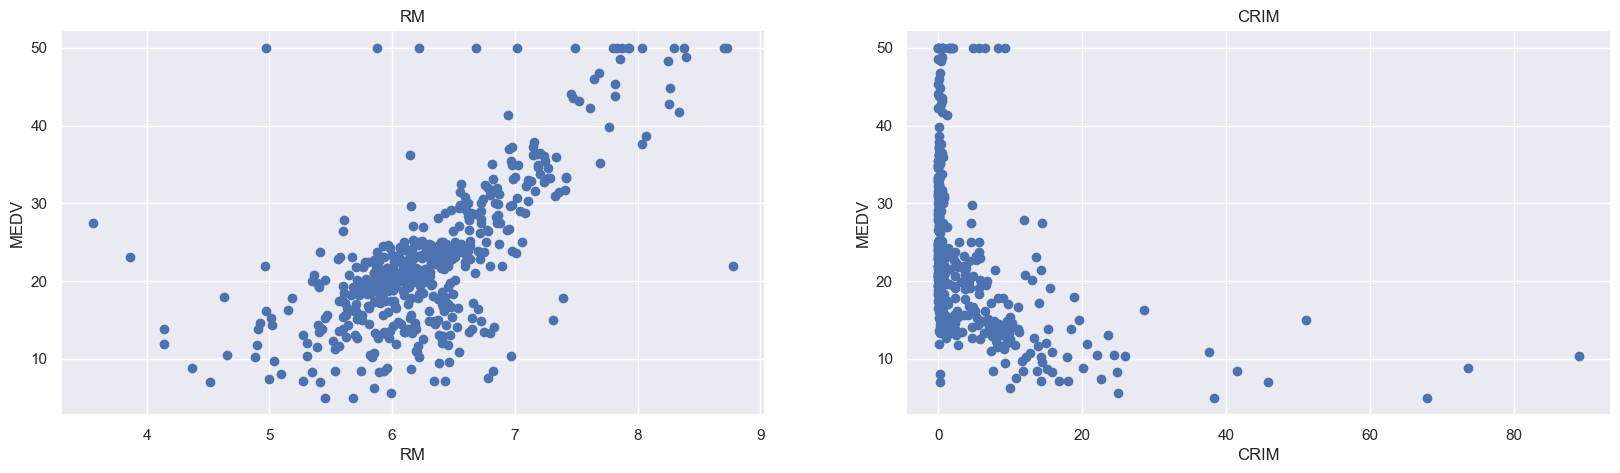

In [16]:
plt.figure(figsize=(20,5))

features=['RM','CRIM']
target= boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x=boston[col]
    y=target
    plt.scatter(x,y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

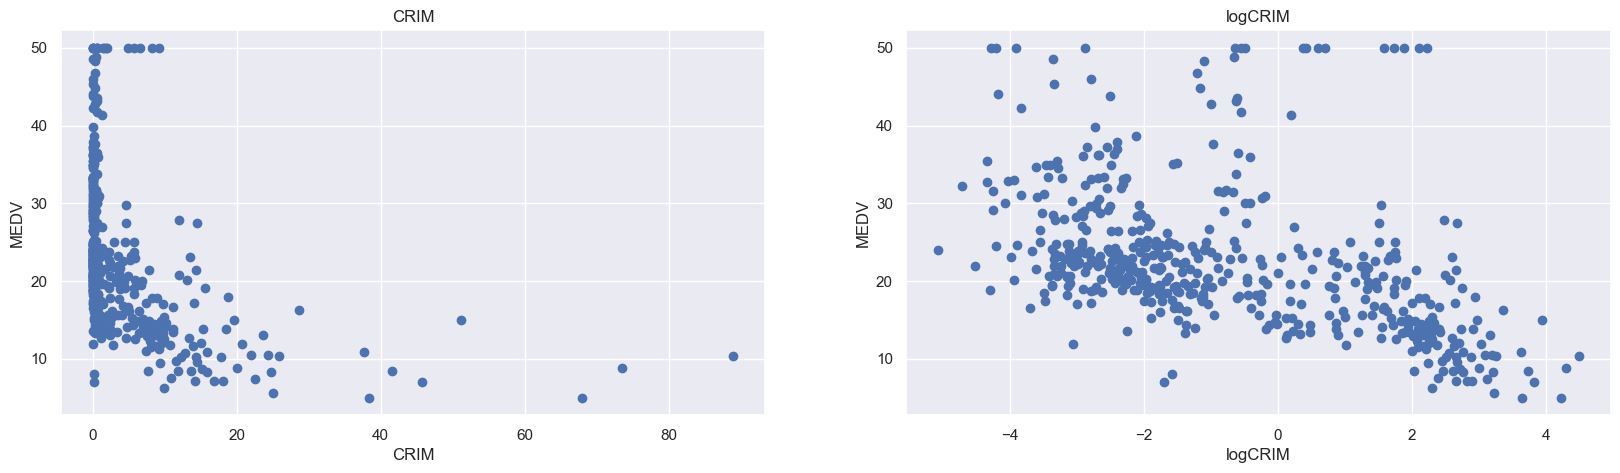

In [17]:
plt.figure(figsize=(20,5))
boston['logCRIM']= np.log(boston['CRIM'])
features= ['CRIM', 'logCRIM']
target=boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features), i+1)
    x=boston[col]
    y=target
    plt.scatter(x,y,marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

In [19]:
da=pd.read_csv('nhanes_2015_2016.csv')

In [21]:
vars = ['BPXSY1', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'BMXBMI', 'SMQ020']
da = da[vars].dropna()

In [26]:
import statsmodels.api as sm

In [27]:
model= sm.OLS.from_formula(' BPXSY1 ~ RIDAGEYR', data=da)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1333.
Date:                Tue, 30 May 2023   Prob (F-statistic):          2.09e-259
Time:                        16:33:30   Log-Likelihood:                -21530.
No. Observations:                5102   AIC:                         4.306e+04
Df Residuals:                    5100   BIC:                         4.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.0935      0.685    149.120      0.000     100.751     103.436
RIDAGEYR       0.4759      0.013     36.504      0.000       0.450       0.501
==============================================================================
Omnibus:                      690.261   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1505.999
Skew:                           0.810   Prob(JB):                         0.00
Kurtosis:                       5.112   Cond. No.                         156.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
da.BPXSY1.std()

18.486559500781865

In [29]:
cc= da[['BPXSY1', 'RIDAGEYR']].corr()
print(cc.BPXSY1.RIDAGEYR**2)

0.2071545962518702


In [31]:
cc= np.corrcoef(da.BPXSY1, result.fittedvalues)
print(cc[0,1]**2)

0.20715459625186927


In [32]:
da['RIAGENDRx']= da.RIAGENDR.replace({1:'Male', 2:'Female'})

In [33]:
model= sm.OLS.from_formula('BPXSY1 ~ RIDAGEYR + RIAGENDRx', data=da)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     697.4
Date:                Tue, 30 May 2023   Prob (F-statistic):          1.87e-268
Time:                        16:43:01   Log-Likelihood:                -21505.
No. Observations:                5102   AIC:                         4.302e+04
Df Residuals:                    5099   BIC:                         4.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           100.6305      0.712    141.257      0.000      99.234     102.027
RIAGENDRx[T.Male]     3.2322      0.459      7.040      0.000       2.332       4.132
RIDAGEYR              0.4739      0.013     36.518      0.000       0.448       0.499
==============================================================================
Omnibus:                      706.732   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1582.730
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       5.184   Cond. No.                         168.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [34]:
da[['RIDAGEYR','RIAGENDR']].corr()

,RIDAGEYR,RIAGENDR
RIDAGEYR,1.000000,-0.021398
RIAGENDR,-0.021398,1.000000


In [35]:
cc=np.corrcoef(da.BPXSY1, result.fittedvalues)
print(cc[0,1]**2)

0.21478581086243803


In [36]:
model=sm.OLS.from_formula('BPXSY1 ~ RIDAGEYR + RIAGENDRx+ BMXBMI', data=da)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     502.0
Date:                Tue, 30 May 2023   Prob (F-statistic):          8.54e-286
Time:                        16:48:57   Log-Likelihood:                -21461.
No. Observations:                5102   AIC:                         4.293e+04
Df Residuals:                    5098   BIC:                         4.296e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            91.5840      1.198     76.456      0.000      89.236      93.932
RIAGENDRx[T.Male]     3.5783      0.457      7.833      0.000       2.683       4.474
RIDAGEYR              0.4709      0.013     36.582      0.000       0.446       0.496
BMXBMI                0.3060      0.033      9.351      0.000       0.242       0.370
==============================================================================
Omnibus:                      752.325   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.087
Skew:                           0.847   Prob(JB):                         0.00
Kurtosis:                       5.343   Cond. No.                         316.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [38]:
da[['RIDAGEYR','RIAGENDR','BMXBMI']].corr()

,RIDAGEYR,RIAGENDR,BMXBMI
RIDAGEYR,1.000000,-0.021398,0.023089
RIAGENDR,-0.021398,1.000000,0.080463
BMXBMI,0.023089,0.080463,1.000000


In [40]:
from statsmodels.sandbox.predict_functional import predict_functional

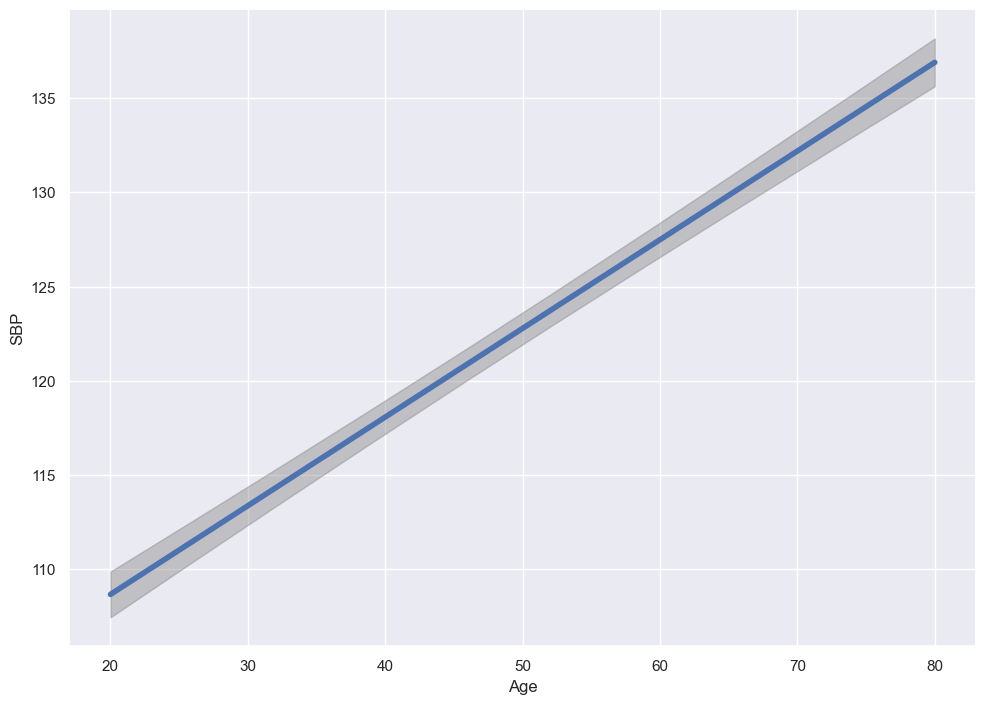

In [42]:
values = {'RIAGENDRx': 'Female', "RIAGENDR": 1, 'BMXBMI':25, 'DMDEDUC2': 1, 'RIDRETH1': 1, 'SMQ020':1}
pr,cb,fv = predict_functional(result, 'RIDAGEYR', 
                values=values, ci_method="simultaneous")
ax= sns.lineplot(fv,pr,lw=4)
ax.fill_between(fv,cb[:,0], cb[:,1], color='grey', alpha=0.4)
ax.set_xlabel('Age')
_=ax.set_ylabel('SBP')

In [41]:
da.columns

Index(['BPXSY1', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'BMXBMI',
       'SMQ020', 'RIAGENDRx'],
      dtype='object')

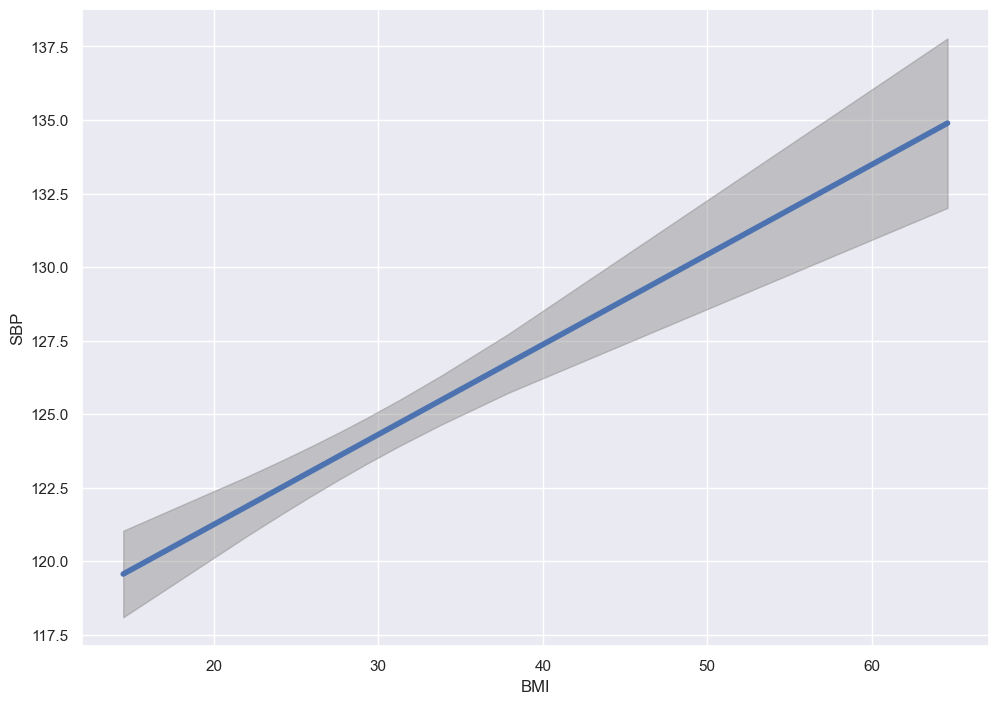

In [43]:
del values['BMXBMI']
values['RIDAGEYR']=50
pr,cb, fv= predict_functional(result, 'BMXBMI',
                values= values, ci_method='simultaneous')
ax= sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:,0], cb[:,1], color='grey', alpha=0.4)
ax.set_xlabel('BMI')
_=ax.set_ylabel('SBP')

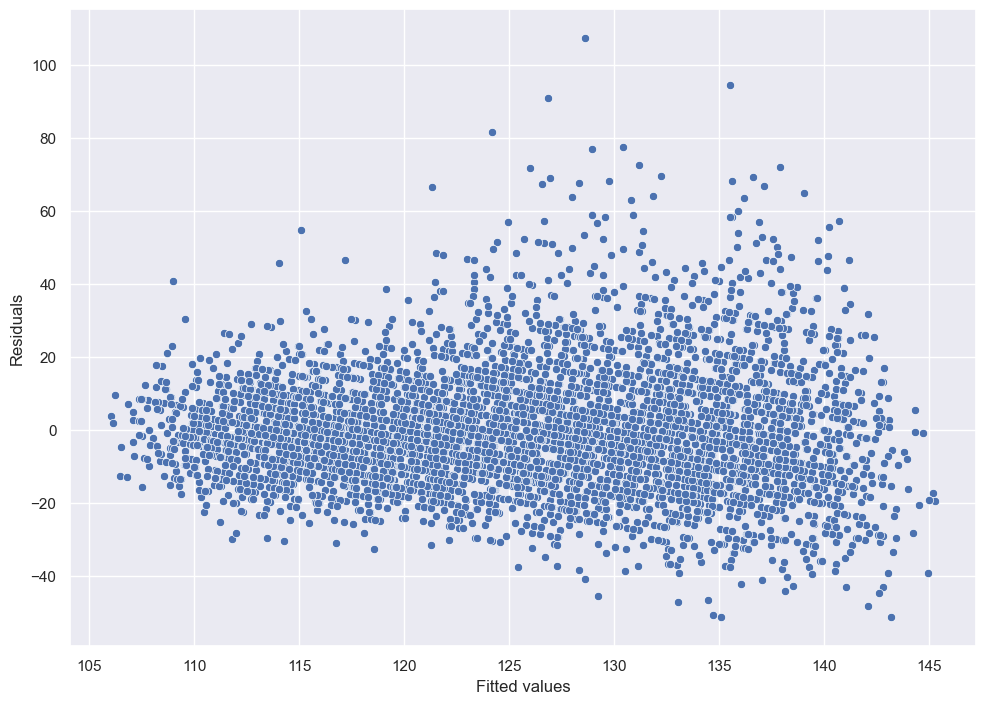

In [44]:
pp= sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel('Fitted values')
_=pp.set_ylabel('Residuals')

In [49]:
from statsmodels.graphics.regressionplots import plot_ccpr
from statsmodels.graphics.regressionplots import add_lowess

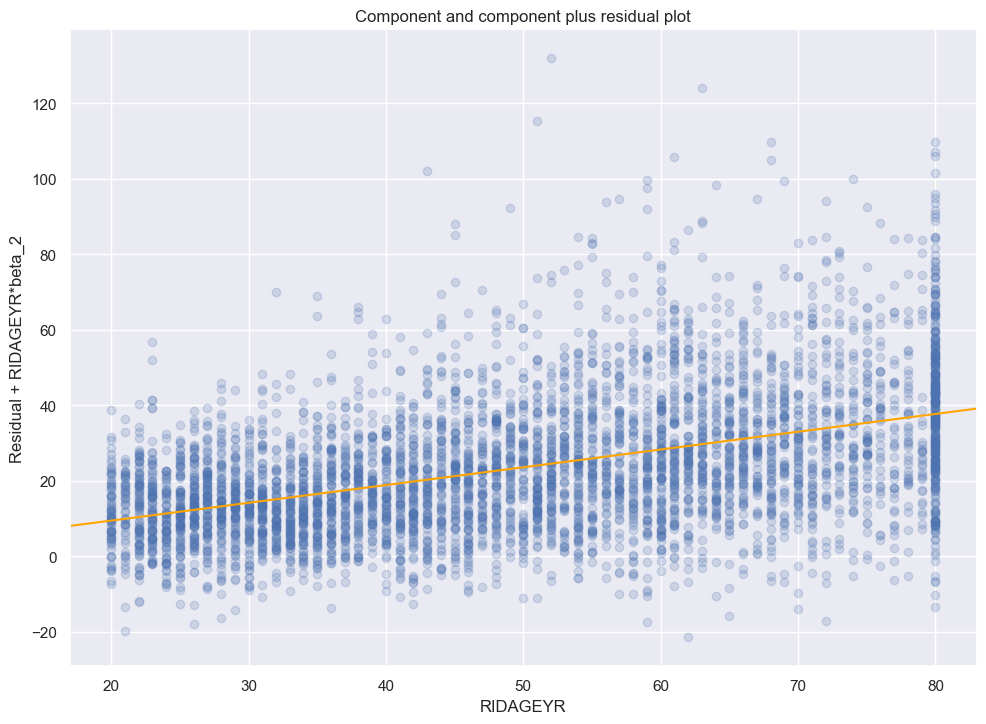

In [47]:
ax= plt.axes()
plot_ccpr(result, 'RIDAGEYR', ax)
ax.lines[0].set_alpha(0.2)
_=ax.lines[1].set_color('orange')

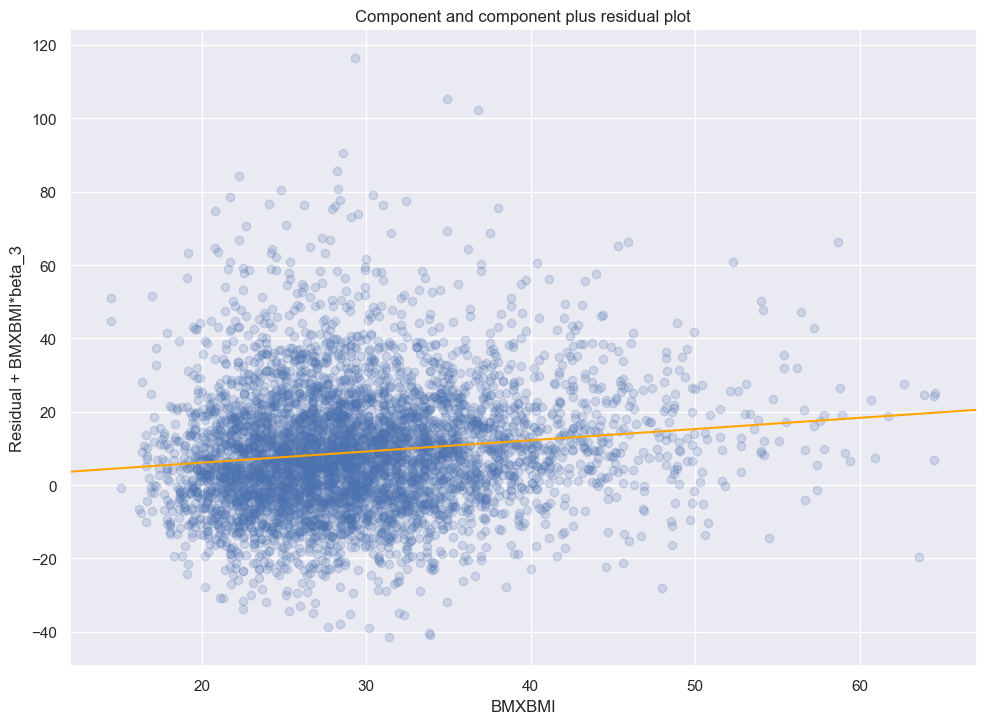

In [48]:
ax= plt.axes()
plot_ccpr(result, 'BMXBMI', ax)
ax.lines[0].set_alpha(0.2)
_=ax.lines[1].set_color('orange')

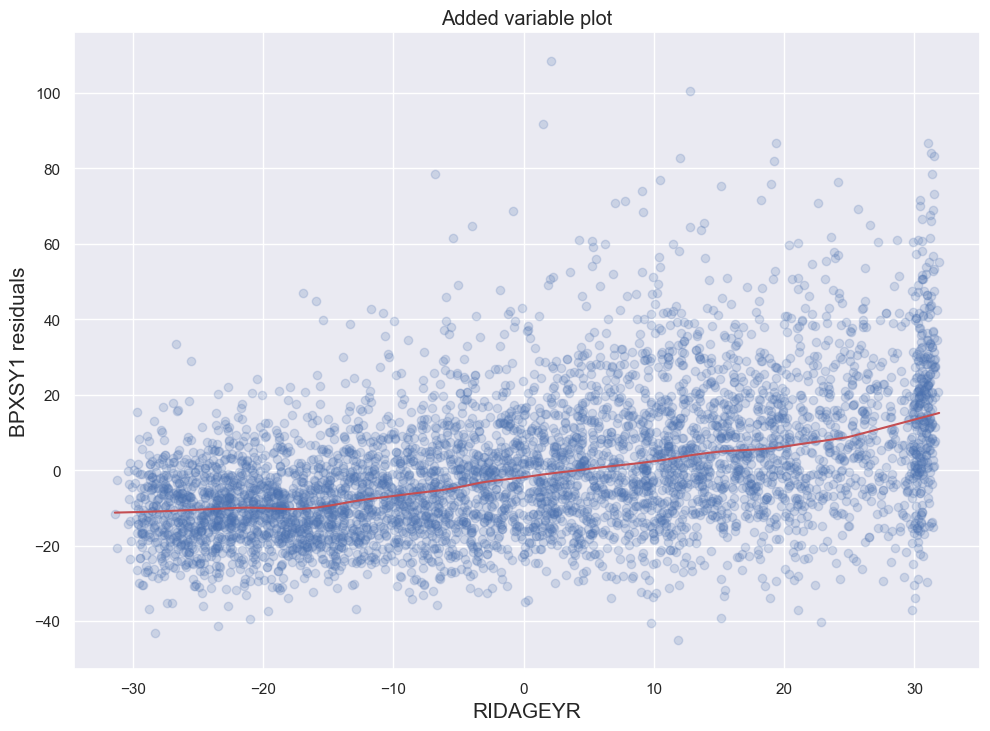

In [52]:
model= sm.GLM.from_formula('BPXSY1 ~ RIDAGEYR + BMXBMI + RIAGENDRx', data=da)
result= model.fit()
result.summary()

fig= result.plot_added_variable('RIDAGEYR')
ax= fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_=add_lowess(ax)

In [53]:
da['smq']= da.SMQ020.replace({2: 0, 7: np.nan, 9: np.nan})

In [54]:
c= pd.crosstab(da.RIAGENDRx, da.smq).apply(lambda x:x/x.sum(), axis=1)
c['odds']= c.loc[:, 1]/ c.loc[:,0]
c

smq,0.0,1.0,odds
RIAGENDRx,,,
Female,0.680197,0.319803,0.470162
Male,0.467453,0.532547,1.139252


In [55]:
c.odds.Male/c.odds.Female

2.423105552613186

In [56]:
c['logodds']= np.log(c.odds)

In [57]:
model= sm.GLM.from_formula('smq~ RIAGENDRx', family=sm.families.Binomial(), data=da)
result= model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5094
Model:                            GLM   Df Residuals:                     5092
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3350.6
Date:                Tue, 30 May 2023   Deviance:                       6701.2
Time:                        18:40:38   Pearson chi2:                 5.09e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.04557
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -0.7547      0.042    -18.071      0.000      -0.837      -0.673
RIAGENDRx[T.Male]     0.8851      0.058     15.227      0.000       0.771       0.999
=====================================================================================
"""

In [58]:
c.logodds.Male - c.logodds.Female

0.8850500036644218

In [59]:
model= sm.GLM.from_formula('smq~ RIDAGEYR + RIAGENDRx', family=sm.families.Binomial(), data=da)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5094
Model:                            GLM   Df Residuals:                     5091
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3296.6
Date:                Tue, 30 May 2023   Deviance:                       6593.2
Time:                        18:42:54   Pearson chi2:                 5.10e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.06558
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            -1.6166      0.095    -16.985      0.000      -1.803      -1.430
RIAGENDRx[T.Male]     0.8920      0.059     15.170      0.000       0.777       1.007
RIDAGEYR              0.0172      0.002     10.289      0.000       0.014       0.021
=====================================================================================
"""

In [60]:
da['DMDEDUC2x'] = da.DMDEDUC2.replace({1:'1t9', 2:'x9_11', 3:'HS', 4: 'SomeCollege', 5:'College', 7:np.nan, 9:np.nan})
model=sm.GLM.from_formula('smq~ RIDAGEYR+ RIAGENDRx + DMDEDUC2x', family=sm.families.Binomial(), data=da)
result=model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                    smq   No. Observations:                 5093
Model:                            GLM   Df Residuals:                     5086
Model Family:                Binomial   Df Model:                            6
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -3201.2
Date:                Tue, 30 May 2023   Deviance:                       6402.4
Time:                        18:46:27   Pearson chi2:                 5.10e+03
No. Iterations:                     4   Pseudo R-squ. (CS):            0.09976
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Intercept                   -2.0398      0.138    -14.828      0.000      -2.309      -1.770
RIAGENDRx[T.Male]            0.9096      0.060     15.118      0.000       0.792       1.028
DMDEDUC2x[T.College]        -0.2662      0.109     -2.438      0.015      -0.480      -0.052
DMDEDUC2x[T.HS]              0.6771      0.108      6.280      0.000       0.466       0.888
DMDEDUC2x[T.SomeCollege]     0.5660      0.104      5.460      0.000       0.363       0.769
DMDEDUC2x[T.x9_11]           0.8323      0.122      6.804      0.000       0.593       1.072
RIDAGEYR                     0.0183      0.002     10.582      0.000       0.015       0.022
============================================================================================
"""

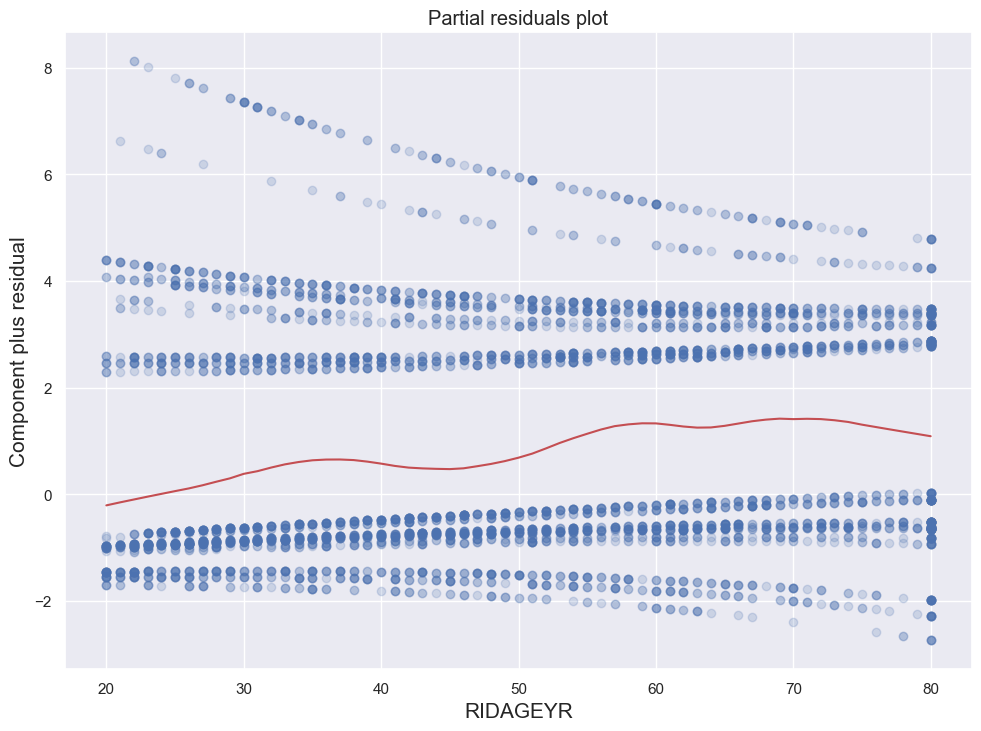

In [61]:
fig= result.plot_partial_residuals('RIDAGEYR')
ax=fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_=add_lowess(ax)

In [51]:
da.columns

Index(['BPXSY1', 'RIDAGEYR', 'RIAGENDR', 'RIDRETH1', 'DMDEDUC2', 'BMXBMI',
       'SMQ020', 'RIAGENDRx'],
      dtype='object')